**Titulo** Unai Bermúdez Osaba | 26/11/2023

**Descripción :** Diseñar un modelo de clasificación supervisada que, dado un conjunto de tweets como entrada (input: texto del tweet), prediga con la mayor precisión posible si el autor tiene tendencias suicidas o no, optimizando el F-score como métrica principal.


**ANALISIS DE LOS DATOS**

Total de instancias: 9206

Clase 0:
  - Número de instancias: 5144
  - Porcentaje: 55.88%

Clase 1:
  - Número de instancias: 4062
  - Porcentaje: 44.12%


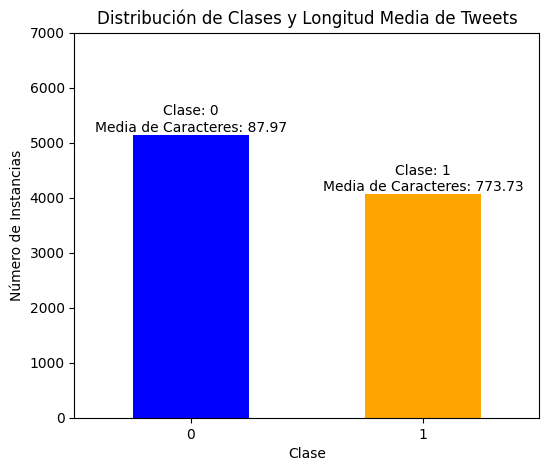


Media de Caracteres de todos los tweets: 390.55

Longitud media de los tweets por clase:
label
0     87.965591
1    773.730675
Name: tweet, dtype: float64


In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV con encoding 'latin1'
file_path = 'data/suicidal_data.csv'  # Ajusta la ruta según tu estructura de carpetas
df = pd.read_csv(file_path, encoding='latin1')

# Longitud media de los tweets por clase
average_length_per_class = df.groupby('label')['tweet'].apply(lambda x: x.str.len().mean())

# Información general sobre el conjunto de datos
total_instances = len(df)
print(f"Total de instancias: {total_instances}")

# Ajustar el tamaño del gráfico
plt.figure(figsize=(6, 5))
plt.ylim(0, 7000)

# Grafico de barras para la distribución de clases
class_distribution = df['label'].value_counts()
colors = ['blue', 'orange']  # Ajusta los colores según tus preferencias
ax = class_distribution.plot(kind='bar', rot=0, color=colors)

# Etiquetar las barras con la longitud media de los tweets de cada clase
for i, v in enumerate(class_distribution):
    class_label = average_length_per_class.index[i]
    average_length = average_length_per_class.iloc[i]
    ax.text(i, v + 5, f"Clase: {class_label}\nMedia de Caracteres: {average_length:.2f}", ha='center', va='bottom')

plt.title('Distribución de Clases y Longitud Media de Tweets')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')

# Número de instancias y porcentaje por clase
for i, count in enumerate(class_distribution):
    class_label = class_distribution.index[i]
    percentage = (count / total_instances) * 100
    print(f"\nClase {class_label}:")
    print(f"  - Número de instancias: {count}")
    print(f"  - Porcentaje: {percentage:.2f}%")

plt.show()

# Longitud media de todos los tweets
average_length_all_tweets = df['tweet'].apply(len).mean()
print(f"\nMedia de Caracteres de todos los tweets: {average_length_all_tweets:.2f}")

# Longitud media de los tweets por clase
print("\nLongitud media de los tweets por clase:")
print(average_length_per_class)


**PREPROCESO DE LOS DATOS**

In [119]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import emoji

# Descargar recursos necesarios para NLTK (puedes hacerlo solo una vez)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Verificar y eliminar filas nulas
df = df.dropna(subset=['tweet'])

# Funciones de preprocesamiento

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Manejar emojis
    text = emoji.demojize(text)
    # Eliminar puntuación
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Aplicar preprocesamiento a la columna 'tweet'
df['processed_tweet'] = df['tweet'].apply(preprocess_text)

# Mostrar algunos ejemplos antes y después del preprocesamiento
print("Ejemplos después del preprocesamiento:")
print(df[['tweet', 'processed_tweet']].head(5))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\unai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\unai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\unai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Ejemplos después del preprocesamiento:
                                                                                                                                                                                                                                                                                                                                                                                                     tweet  \
0  my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge to run my car head first into the next person coming the opposite way when will i stop feeling jealous of tragic characters like gomer pile for the swift end they were able to bring to their lives   
1                                                                                                                                                                    

**VECTORIZACION**

    BOW con CountVectorizer Normal

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con Bag of Words
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_bow, y_train)

# Predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test_bow)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas de evaluación
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - Bag of Words')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

    BOW con CountVectorizer max-features= 5000, 10000, 15000 y 20000

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Diferentes valores para max_features
max_features_values = [5000, 10000, 15000, 20000]

for max_features in max_features_values:
    # Vectorización con Bag of Words
    vectorizer = CountVectorizer(max_features=max_features)
    X_train_bow = vectorizer.fit_transform(X_train)
    X_test_bow = vectorizer.transform(X_test)

    # Modelo de clasificación (Random Forest en este caso)
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train_bow, y_train)

    # Predicciones en el conjunto de prueba
    y_pred = classifier.predict(X_test_bow)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Mostrar métricas de evaluación
    print(f"\nMétricas para max_features={max_features}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Visualizar la matriz de confusión
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
    plt.title(f'Confusion Matrix - Bag of Words (max_features={max_features})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


    BOW con CountVectorizer con N-gramas (1, 2) 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Configuración 2: CountVectorizer con N-gramas (1, 2)
vectorizer_count_ngram = CountVectorizer(ngram_range=(1, 2))
X_train_bow_count_ngram = vectorizer_count_ngram.fit_transform(X_train)

# Modelo de clasificación (Random Forest en este caso)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_bow_count_ngram, y_train)

# Predicciones en el conjunto de prueba
y_pred = classifier.predict(vectorizer_count_ngram.transform(X_test))

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas de evaluación
print("Estadísticas para CountVectorizer con N-gramas (1, 2):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - CountVectorizer con N-gramas (1, 2)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

    TF-IDF normal

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_tfidf, y_train)

# Predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test_tfidf)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas de evaluación
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - TF-IDF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


    TF-IDF con ajuste de N-gramas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF y ajuste de N-gramas
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf_ngram = vectorizer_ngram.fit_transform(X_train)
X_test_tfidf_ngram = vectorizer_ngram.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier_ngram = RandomForestClassifier(random_state=42)
classifier_ngram.fit(X_train_tfidf_ngram, y_train)

# Predicciones en el conjunto de prueba
y_pred_ngram = classifier_ngram.predict(X_test_tfidf_ngram)

# Calcular métricas de evaluación
accuracy_ngram = accuracy_score(y_test, y_pred_ngram)
precision_ngram = precision_score(y_test, y_pred_ngram)
recall_ngram = recall_score(y_test, y_pred_ngram)
f1_ngram = f1_score(y_test, y_pred_ngram)
conf_matrix_ngram = confusion_matrix(y_test, y_pred_ngram)

# Mostrar métricas de evaluación
print("Métricas para Ajuste de N-gramas:")
print(f"Accuracy: {accuracy_ngram:.4f}")
print(f"Precision: {precision_ngram:.4f}")
print(f"Recall: {recall_ngram:.4f}")
print(f"F1 Score: {f1_ngram:.4f}")
print("Confusion Matrix:")
print(conf_matrix_ngram)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix_ngram, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - TF-IDF con Ajuste de N-gramas')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


    TF-IDF con Frecuencia Mínima del Documento

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF y Frecuencia Mínima del Documento
vectorizer_min_df = TfidfVectorizer(min_df=5)
X_train_tfidf_min_df = vectorizer_min_df.fit_transform(X_train)
X_test_tfidf_min_df = vectorizer_min_df.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier_min_df = RandomForestClassifier(random_state=42)
classifier_min_df.fit(X_train_tfidf_min_df, y_train)

# Predicciones en el conjunto de prueba
y_pred_min_df = classifier_min_df.predict(X_test_tfidf_min_df)

# Calcular métricas de evaluación
accuracy_min_df = accuracy_score(y_test, y_pred_min_df)
precision_min_df = precision_score(y_test, y_pred_min_df)
recall_min_df = recall_score(y_test, y_pred_min_df)
f1_min_df = f1_score(y_test, y_pred_min_df)
conf_matrix_min_df = confusion_matrix(y_test, y_pred_min_df)

# Mostrar métricas de evaluación
print("\nMétricas para Frecuencia Mínima del Documento:")
print(f"Accuracy: {accuracy_min_df:.4f}")
print(f"Precision: {precision_min_df:.4f}")
print(f"Recall: {recall_min_df:.4f}")
print(f"F1 Score: {f1_min_df:.4f}")
print("Confusion Matrix:")
print(conf_matrix_min_df)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix_min_df, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - TF-IDF con Frecuencia Mínima del Documento')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


    TF-IDF con Ponderación de Términos por IDF ponderada por TF

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF y Ponderación de Términos por IDF ponderada por TF
vectorizer_use_idf = TfidfVectorizer(use_idf=False)
X_train_tfidf_use_idf = vectorizer_use_idf.fit_transform(X_train)
X_test_tfidf_use_idf = vectorizer_use_idf.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier_use_idf = RandomForestClassifier(random_state=42)
classifier_use_idf.fit(X_train_tfidf_use_idf, y_train)

# Predicciones en el conjunto de prueba
y_pred_use_idf = classifier_use_idf.predict(X_test_tfidf_use_idf)

# Calcular métricas de evaluación
accuracy_use_idf = accuracy_score(y_test, y_pred_use_idf)
precision_use_idf = precision_score(y_test, y_pred_use_idf)
recall_use_idf = recall_score(y_test, y_pred_use_idf)
f1_use_idf = f1_score(y_test, y_pred_use_idf)
conf_matrix_use_idf = confusion_matrix(y_test, y_pred_use_idf)

# Mostrar métricas de evaluación
print("\nMétricas para Ponderación de Términos por IDF ponderada por TF:")
print(f"Accuracy: {accuracy_use_idf:.4f}")
print(f"Precision: {precision_use_idf:.4f}")
print(f"Recall: {recall_use_idf:.4f}")
print(f"F1 Score: {f1_use_idf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_use_idf)


# Visualizar la matriz de confusión
sns.heatmap(conf_matrix_use_idf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - TF-IDF con Ponderación de Términos por IDF ponderada por TF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


    Classifier 1: baseline

In [120]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Datos reales
y_true = np.concatenate([np.zeros(5144), np.ones(4062)])

# Clasificación aleatoria
y_random = np.random.choice([0, 1], size=len(y_true))

# Calcular métricas
accuracy_random = accuracy_score(y_true, y_random)
precision_random = precision_score(y_true, y_random)
recall_random = recall_score(y_true, y_random)
f1_random = f1_score(y_true, y_random)
conf_matrix_random = confusion_matrix(y_true, y_random)

# Mostrar métricas
print(f"Accuracy (Baseline aleatorio): {accuracy_random:.4f}")
print(f"Precision (Baseline aleatorio): {precision_random:.4f}")
print(f"Recall (Baseline aleatorio): {recall_random:.4f}")
print(f"F1 Score (Baseline aleatorio): {f1_random:.4f}")
print("Confusion Matrix (Baseline aleatorio):")
print(conf_matrix_random)


Accuracy (Baseline aleatorio): 0.5010
Precision (Baseline aleatorio): 0.4426
Recall (Baseline aleatorio): 0.5047
F1 Score (Baseline aleatorio): 0.4716
Confusion Matrix (Baseline aleatorio):
[[2562 2582]
 [2012 2050]]


    Classifier 2: your approach

COMPARAR LOGISTIC REGRESION CON RANDOM FOREST

           Regresión Logística  Random Forest
Accuracy              0.893594       0.909338
Precision             0.923387       0.950752
Recall                0.831719       0.841404
F1 Score              0.875159       0.892742


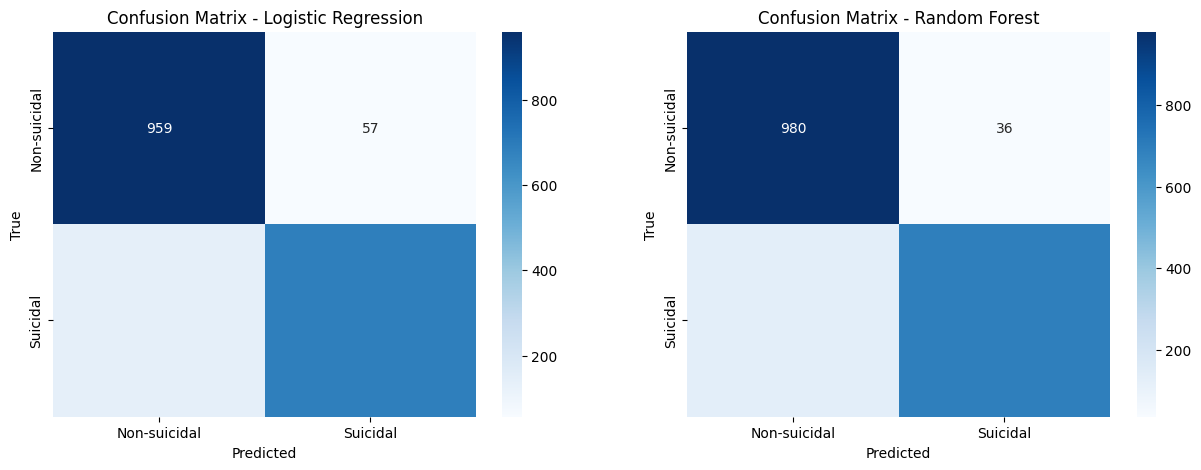

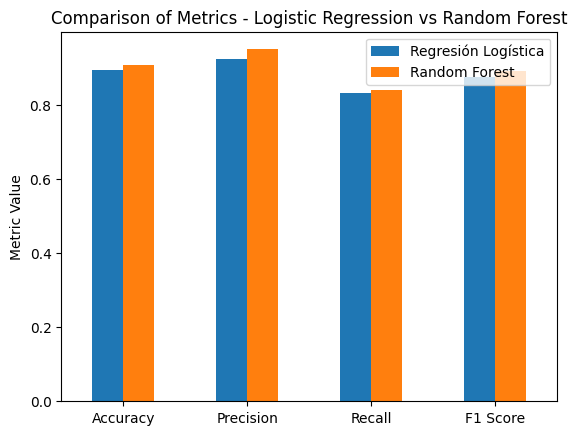

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF y Ponderación de Términos por IDF ponderada por TF
vectorizer_use_idf = TfidfVectorizer(use_idf=False)
X_train_tfidf_use_idf = vectorizer_use_idf.fit_transform(X_train)
X_test_tfidf_use_idf = vectorizer_use_idf.transform(X_test)

# Modelo de clasificación (Regresión Logística)
classifier_logistic = LogisticRegression(random_state=42)
classifier_logistic.fit(X_train_tfidf_use_idf, y_train)
y_pred_logistic = classifier_logistic.predict(X_test_tfidf_use_idf)

# Modelo de clasificación (Random Forest)
classifier_rf = RandomForestClassifier(random_state=42)
classifier_rf.fit(X_train_tfidf_use_idf, y_train)
y_pred_rf = classifier_rf.predict(X_test_tfidf_use_idf)

# Calcular métricas de evaluación
metrics_logistic = {
    'Accuracy': accuracy_score(y_test, y_pred_logistic),
    'Precision': precision_score(y_test, y_pred_logistic),
    'Recall': recall_score(y_test, y_pred_logistic),
    'F1 Score': f1_score(y_test, y_pred_logistic)
}

metrics_rf = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}

# Crear un DataFrame para facilitar la visualización
df_metrics = pd.DataFrame({'Regresión Logística': metrics_logistic, 'Random Forest': metrics_rf})

# Mostrar métricas de evaluación
print(df_metrics)

# Visualizar las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix - Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Confusion Matrix - Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'], ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

# Gráfico de barras para comparar métricas
df_metrics.plot(kind='bar', rot=0)
plt.title('Comparison of Metrics - Logistic Regression vs Random Forest')
plt.ylabel('Metric Value')
plt.show()


    Experimental results to validate RQ1

**PREDICCION INICIAL**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar los datos desde el archivo CSV con encoding 'latin1'
file_path = 'data/suicidal_data.csv'  # Ajusta la ruta según tu estructura de carpetas
df = pd.read_csv(file_path, encoding='latin1')

# Verificar y eliminar filas nulas
df = df.dropna(subset=['tweet'])

# Funciones de preprocesamiento
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Manejar emojis
    text = emoji.demojize(text)
    # Eliminar puntuación
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Aplicar preprocesamiento a la columna 'tweet'
df['processed_tweet'] = df['tweet'].apply(preprocess_text)


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF y Ponderación de Términos por IDF ponderada por TF
vectorizer_use_idf = TfidfVectorizer(use_idf=False)
X_train_tfidf_use_idf = vectorizer_use_idf.fit_transform(X_train)
X_test_tfidf_use_idf = vectorizer_use_idf.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier_use_idf = RandomForestClassifier(random_state=42)
classifier_use_idf.fit(X_train_tfidf_use_idf, y_train)

# Predicciones en el conjunto de prueba
y_pred_use_idf = classifier_use_idf.predict(X_test_tfidf_use_idf)

# Calcular métricas de evaluación
accuracy_use_idf = accuracy_score(y_test, y_pred_use_idf)
precision_use_idf = precision_score(y_test, y_pred_use_idf)
recall_use_idf = recall_score(y_test, y_pred_use_idf)
f1_use_idf = f1_score(y_test, y_pred_use_idf)
conf_matrix_use_idf = confusion_matrix(y_test, y_pred_use_idf)

# Mostrar métricas de evaluación
print("Métricas para Ponderación de Términos por IDF ponderada por TF:")
print(f"Accuracy: {accuracy_use_idf:.4f}")
print(f"Precision: {precision_use_idf:.4f}")
print(f"Recall: {recall_use_idf:.4f}")
print(f"F1 Score: {f1_use_idf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_use_idf)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix_use_idf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - Predicción Inicial')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Iteración por Porcentajes de Instancias:** <br>
Se itera sobre diferentes porcentajes de instancias (del 10% al 100%) para construir conjuntos de entrenamiento de diversos tamaños.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV con encoding 'latin1'
file_path = 'data/suicidal_data.csv'  # Ajusta la ruta según tu estructura de carpetas
df = pd.read_csv(file_path, encoding='latin1')

# Verificar y eliminar filas nulas
df = df.dropna(subset=['tweet'])

# Funciones de preprocesamiento
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Manejar emojis
    text = emoji.demojize(text)
    # Eliminar puntuación
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Aplicar preprocesamiento a la columna 'tweet'
df['processed_tweet'] = df['tweet'].apply(preprocess_text)


# Definir porcentajes para la iteración
percentages = np.arange(0.1, 1.1, 0.1)

# Inicializar lista para almacenar los valores de F1 Score
f1_scores = []


# Iterar sobre los porcentajes
for percentage in percentages:
    # Calcular el número de instancias según el porcentaje actual
    num_instances = int(len(df) * percentage)

    # Tomar el porcentaje de datos y dividir en conjunto de entrenamiento y prueba
    data_subset = df.sample(n=num_instances, random_state=42)
    train_data, test_data = train_test_split(data_subset, test_size=0.2, random_state=42, shuffle=True, stratify=data_subset['label'])

    # Vectorización con TF-IDF y Ponderación de Términos por IDF ponderada por TF
    vectorizer = TfidfVectorizer(use_idf=False)
    X_train_tfidf = vectorizer.fit_transform(train_data['processed_tweet'])
    X_test_tfidf = vectorizer.transform(test_data['processed_tweet'])

    # Modelo de clasificación (Random Forest en este caso)
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train_tfidf, train_data['label'])

    # Predicciones en el conjunto de prueba
    y_pred = classifier.predict(X_test_tfidf)

    # Calcular métrica de evaluación (F1 Score) y almacenarla
    f1_scores.append(f1_score(test_data['label'], y_pred))

# Visualizar la relación entre el porcentaje de instancias y el F1 Score
plt.figure(figsize=(10, 6))
plt.plot(percentages, f1_scores, marker='o')
plt.title('Relación entre el Porcentaje de Instancias y el F1 Score')
plt.xlabel('Porcentaje de Instancias')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


**Perturbaciones Artificiales** <br>
Introduce perturbaciones artificiales en el conjunto de datos, como agregar ruido o perturbar ligeramente las características. Luego, observa cómo cambian las predicciones del modelo. Esto puede ayudarte a entender la robustez del modelo ante pequeñas variaciones en los datos.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import random

# Funciones de perturbación
def replace_characters(text, percentage):
    if len(text) == 0:
        return text

    num_chars = max(1, int(percentage * len(text)))
    indices_to_replace = random.sample(range(len(text)), num_chars)

    text_list = list(text)
    for index in indices_to_replace:
        text_list[index] = 'x'

    return ''.join(text_list)

def insert_random_words(text, num_words):
    words = text.split()
    for _ in range(num_words):
        index = random.randint(0, len(words))
        words.insert(index, 'random_word')
    return ' '.join(words)

def remove_random_words(text, num_words):
    words = text.split()
    indices_to_remove = random.sample(range(len(words)), min(num_words, len(words)))
    words = [word for i, word in enumerate(words) if i not in indices_to_remove]
    return ' '.join(words)

def shuffle_words(text):
    words = text.split()
    random.shuffle(words)
    return ' '.join(words)


In [ ]:
# Leer los datos y realizar preprocesamiento
file_path = 'data/suicidal_data.csv'
df = pd.read_csv(file_path, encoding='latin1').dropna(subset=['tweet'])
df['processed_tweet'] = df['tweet'].apply(preprocess_text)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF y Ponderación de Términos por IDF ponderada por TF
vectorizer = TfidfVectorizer(use_idf=False)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_tfidf, y_train)


In [ ]:
# Predicción normal
y_pred_normal = classifier.predict(X_test_tfidf)
f1_normal = f1_score(y_test, y_pred_normal)
fscores = {'normal': f1_normal}


In [ ]:
# Reemplazar el 5% de los caracteres
param_replace_5 = 0.05
perturbed_text_replace_5 = X_test.apply(lambda x: replace_characters(x, param_replace_5))
X_test_perturbed_replace_5 = vectorizer.transform(perturbed_text_replace_5)
y_pred_perturbed_replace_5 = classifier.predict(X_test_perturbed_replace_5)
fscore_perturbed_replace_5 = f1_score(y_test, y_pred_perturbed_replace_5)
fscores['replace_characters_5%'] = fscore_perturbed_replace_5


In [ ]:
# Reemplazar el 10% de los caracteres
param_replace_10 = 0.10
perturbed_text_replace_10 = X_test.apply(lambda x: replace_characters(x, param_replace_10))
X_test_perturbed_replace_10 = vectorizer.transform(perturbed_text_replace_10)
y_pred_perturbed_replace_10 = classifier.predict(X_test_perturbed_replace_10)
fscore_perturbed_replace_10 = f1_score(y_test, y_pred_perturbed_replace_10)
fscores['replace_characters_10%'] = fscore_perturbed_replace_10


In [ ]:
# Reemplazar el 15% de los caracteres
param_replace_15 = 0.15
perturbed_text_replace_15 = X_test.apply(lambda x: replace_characters(x, param_replace_15))
X_test_perturbed_replace_15 = vectorizer.transform(perturbed_text_replace_15)
y_pred_perturbed_replace_15 = classifier.predict(X_test_perturbed_replace_15)
fscore_perturbed_replace_15 = f1_score(y_test, y_pred_perturbed_replace_15)
fscores['replace_characters_15%'] = fscore_perturbed_replace_15


In [ ]:
# Reemplazar el 20% de los caracteres
param_replace_20 = 0.20
perturbed_text_replace_20 = X_test.apply(lambda x: replace_characters(x, param_replace_20))
X_test_perturbed_replace_20 = vectorizer.transform(perturbed_text_replace_20)
y_pred_perturbed_replace_20 = classifier.predict(X_test_perturbed_replace_20)
fscore_perturbed_replace_20 = f1_score(y_test, y_pred_perturbed_replace_20)
fscores['replace_characters_20%'] = fscore_perturbed_replace_20


In [ ]:
# Insertar palabras aleatorias (pequeño)
param_insert_small = 2
perturbed_text_insert_small = X_test.apply(lambda x: insert_random_words(x, param_insert_small))
X_test_perturbed_insert_small = vectorizer.transform(perturbed_text_insert_small)
y_pred_perturbed_insert_small = classifier.predict(X_test_perturbed_insert_small)
fscore_perturbed_insert_small = f1_score(y_test, y_pred_perturbed_insert_small)
fscores['insert_random_words_small'] = fscore_perturbed_insert_small


In [ ]:
# Insertar palabras aleatorias (mediano)
param_insert_medium = 5
perturbed_text_insert_medium = X_test.apply(lambda x: insert_random_words(x, param_insert_medium))
X_test_perturbed_insert_medium = vectorizer.transform(perturbed_text_insert_medium)
y_pred_perturbed_insert_medium = classifier.predict(X_test_perturbed_insert_medium)
fscore_perturbed_insert_medium = f1_score(y_test, y_pred_perturbed_insert_medium)
fscores['insert_random_words_medium'] = fscore_perturbed_insert_medium


In [ ]:
# Insertar palabras aleatorias (grande)
param_insert_large = 50
perturbed_text_insert_large = X_test.apply(lambda x: insert_random_words(x, param_insert_large))
X_test_perturbed_insert_large = vectorizer.transform(perturbed_text_insert_large)
y_pred_perturbed_insert_large = classifier.predict(X_test_perturbed_insert_large)
fscore_perturbed_insert_large = f1_score(y_test, y_pred_perturbed_insert_large)
fscores['insert_random_words_large'] = fscore_perturbed_insert_large


In [ ]:
# Eliminar palabras aleatorias (pequeño)
param_remove_small = 2
perturbed_text_remove_small = X_test.apply(lambda x: remove_random_words(x, param_remove_small))
X_test_perturbed_remove_small = vectorizer.transform(perturbed_text_remove_small)
y_pred_perturbed_remove_small = classifier.predict(X_test_perturbed_remove_small)
fscore_perturbed_remove_small = f1_score(y_test, y_pred_perturbed_remove_small)
fscores['remove_random_words_small'] = fscore_perturbed_remove_small


In [ ]:
# Eliminar palabras aleatorias (mediano)
param_remove_medium = 5
perturbed_text_remove_medium = X_test.apply(lambda x: remove_random_words(x, param_remove_medium))
X_test_perturbed_remove_medium = vectorizer.transform(perturbed_text_remove_medium)
y_pred_perturbed_remove_medium = classifier.predict(X_test_perturbed_remove_medium)
fscore_perturbed_remove_medium = f1_score(y_test, y_pred_perturbed_remove_medium)
fscores['remove_random_words_medium'] = fscore_perturbed_remove_medium


In [ ]:
# Eliminar palabras aleatorias (grande)
param_remove_large = 10
perturbed_text_remove_large = X_test.apply(lambda x: remove_random_words(x, param_remove_large))
X_test_perturbed_remove_large = vectorizer.transform(perturbed_text_remove_large)
y_pred_perturbed_remove_large = classifier.predict(X_test_perturbed_remove_large)
fscore_perturbed_remove_large = f1_score(y_test, y_pred_perturbed_remove_large)
fscores['remove_random_words_large'] = fscore_perturbed_remove_large


In [ ]:
# Desordenar las palabras
perturbed_text_shuffle = X_test.apply(shuffle_words)
X_test_perturbed_shuffle = vectorizer.transform(perturbed_text_shuffle)
y_pred_perturbed_shuffle = classifier.predict(X_test_perturbed_shuffle)
fscore_perturbed_shuffle = f1_score(y_test, y_pred_perturbed_shuffle)
fscores['shuffle_words'] = fscore_perturbed_shuffle


In [ ]:
# Crear la tabla ordenada por fscore descendente
table_data = {'Perturbation': list(fscores.keys()), 'F1 Score': list(fscores.values())}
result_table = pd.DataFrame(table_data).sort_values(by='F1 Score', ascending=False)

print(result_table)


**Análisis de Sensibilidad:**<br>
Realiza un análisis de sensibilidad para identificar qué características o instancias tienen un impacto significativo en las predicciones del modelo. 

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV con encoding 'latin1'
file_path = 'data/suicidal_data.csv'  # Ajusta la ruta según tu estructura de carpetas
df = pd.read_csv(file_path, encoding='latin1')

# Verificar y eliminar filas nulas
df = df.dropna(subset=['tweet'])

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Manejar emojis
    text = emoji.demojize(text)
    # Eliminar puntuación
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Aplicar preprocesamiento a la columna 'tweet'
df['processed_tweet'] = df['tweet'].apply(preprocess_text)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF y Ponderación de Términos por IDF ponderada por TF
vectorizer = TfidfVectorizer(use_idf=False)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_tfidf, y_train)

# Calcular la importancia de las características
feature_importances = classifier.feature_importances_

# Obtener los nombres de las características
feature_names = vectorizer.get_feature_names_out()

# Crear un DataFrame con la importancia de cada característica
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las 10 características más importantes
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.title('10 Características Más Importantes')
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.xticks(rotation=45, ha='right')
plt.show()


    Experimental results to validate RQ2

**Análisis de Saturación**<br>
Evalúa cómo cambian las métricas de rendimiento a medida que se agregan más instancias.


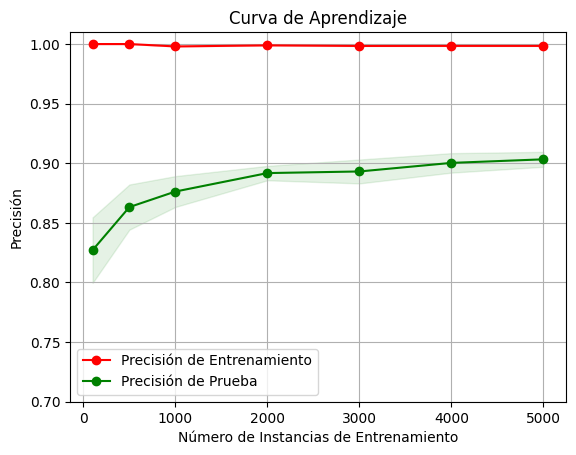

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Función para plotear la curva de aprendizaje
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title("Curva de Aprendizaje")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Número de Instancias de Entrenamiento")
    plt.ylabel("Precisión")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Precisión de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Precisión de Prueba")

    plt.legend(loc="best")
    return plt

# Cargar los datos desde el archivo CSV con encoding 'latin1'
file_path = 'data/suicidal_data.csv'  # Ajusta la ruta según tu estructura de carpetas
df = pd.read_csv(file_path, encoding='latin1')

# Verificar y eliminar filas nulas
df = df.dropna(subset=['tweet'])

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Manejar emojis
    text = emoji.demojize(text)
    # Eliminar puntuación
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Aplicar preprocesamiento a la columna 'tweet'
df['processed_tweet'] = df['tweet'].apply(preprocess_text)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF y Ponderación de Términos por IDF ponderada por TF
vectorizer = TfidfVectorizer(use_idf=False)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Añadir más instancias progresivamente
train_sizes = [100, 500, 1000, 2000, 3000, 4000, 5000]  

# Modelo de clasificación (Random Forest en este caso)
classifier = RandomForestClassifier(random_state=42)

# Plotear la curva de aprendizaje
plot_learning_curve(classifier, X_train_tfidf, y_train, cv=5, ylim=(0.7, 1.01), train_sizes=train_sizes)

plt.show()


**Curva ROC**

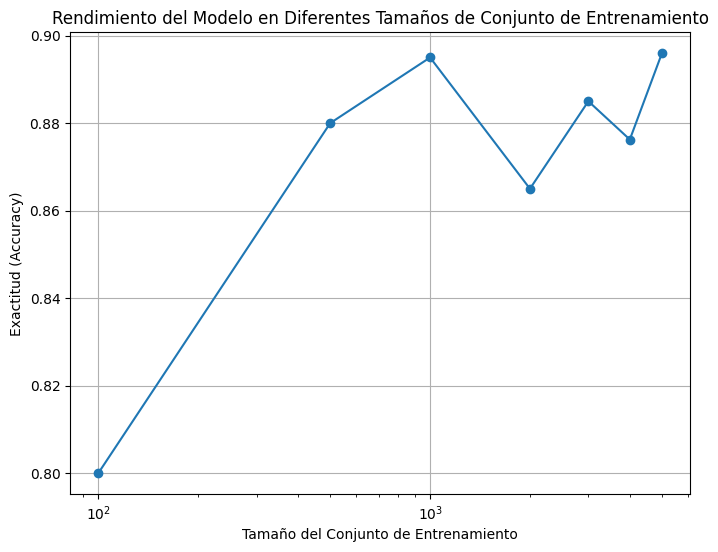

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV con encoding 'latin1'
file_path = 'data/suicidal_data.csv'  # Ajusta la ruta según tu estructura de carpetas
df = pd.read_csv(file_path, encoding='latin1')

# Verificar y eliminar filas nulas
df = df.dropna(subset=['tweet'])

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Manejar emojis
    text = emoji.demojize(text)
    # Eliminar puntuación
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Aplicar preprocesamiento a la columna 'tweet'
df['processed_tweet'] = df['tweet'].apply(preprocess_text)

# Definir tamaños de entrenamiento
train_sizes = [100, 500, 1000, 2000, 3000, 4000, 5000]

# Almacenar las métricas de rendimiento para cada tamaño de entrenamiento
accuracy_scores = []

for size in train_sizes:
    # Dividir los datos en entrenamiento y prueba con el tamaño actual
    df_sampled, _ = train_test_split(df, train_size=size, test_size=None, random_state=42)

    X_train, X_test, y_train, y_test = train_test_split(
        df_sampled['processed_tweet'], df_sampled['label'], test_size=0.2, random_state=42
    )

    # Vectorización con TF-IDF y Ponderación de Términos por IDF ponderada por TF
    vectorizer = TfidfVectorizer(use_idf=False)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Modelo de clasificación (Random Forest en este caso)
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train_tfidf, y_train)

    # Evaluar el rendimiento en el conjunto de prueba
    y_pred = classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Graficar las métricas de rendimiento en función del tamaño del conjunto de entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, accuracy_scores, marker='o')
plt.xscale('log')  # Usar escala logarítmica en el eje x para mejor visualización
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Exactitud (Accuracy)')
plt.title('Rendimiento del Modelo en Diferentes Tamaños de Conjunto de Entrenamiento')
plt.grid(True)
plt.show()
